In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Change y according to the logic gate you want
y = np.array([[0],
              [1],
              [1],
              [1]])

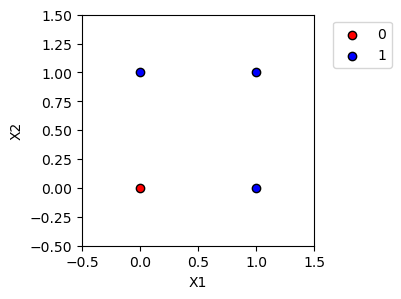

In [3]:
plot_points(X, y)

In [4]:
def preprocess(X, y):
    X_temp = np.hstack((-np.ones((X.shape[0], 1)), X))
    X_preprocessed = np.where(y == 0, -X_temp, X_temp)
    return X_preprocessed

In [5]:
X_preprocessed = preprocess(X, y)
X_preprocessed

array([[ 1., -0., -0.],
       [-1.,  0.,  1.],
       [-1.,  1.,  0.],
       [-1.,  1.,  1.]])

In [6]:
def perceptron(X_preprocessed, max_iter=1000):

    W = np.random.rand(3, 1)
    iter_no = 0
    while iter_no < max_iter:
        num_errors = 0
        for row in X_preprocessed:
            if np.dot(row, W) <= 0:
                num_errors += 1
                W += row.reshape(-1, 1)
        if num_errors == 0:
            break
        iter_no += 1

    if iter_no == max_iter:
        print("The algorithm did not converge")
    else:
        print("The algorithm converged in {} iterations".format(iter_no))
    return W

In [7]:
W = perceptron(X_preprocessed)
W

The algorithm converged in 3 iterations


array([[0.76328465],
       [1.36165528],
       [1.66733748]])

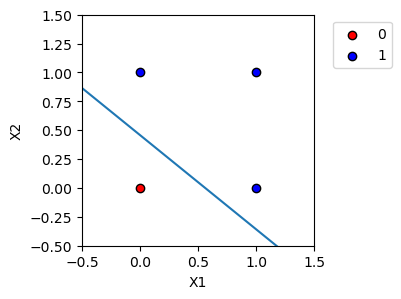

In [8]:
plot_decision_boundary(X, y, W)

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
def preprocess_sigmoid(X, y):
    X_preprocessed = np.hstack((-np.ones((X.shape[0], 1)), X))
    return X_preprocessed

In [11]:
X_preprocessed_sigmoid = preprocess_sigmoid(X, y)
X_preprocessed_sigmoid

array([[-1.,  0.,  0.],
       [-1.,  0.,  1.],
       [-1.,  1.,  0.],
       [-1.,  1.,  1.]])

In [ ]:
def perceptron_sigmoid_mse(X_preprocessed, epochs=10000, lr=0.01):
    W = np.random.rand(3, 1)
    for epoch in range(epochs):
        for i in range(X_preprocessed.shape[0]):
            row = X_preprocessed[i]
            y_true = y[i]
            y_pred = sigmoid(np.dot(row, W))
            error = y_pred - y_true
            W -= lr * error * row.reshape(-1, 1) * y_pred * (1 - y_pred)
    return W

def perceptron_sigmoid_bce(X_preprocessed, epochs=10000, lr=0.1):
    W = np.random.rand(3, 1)
    for epoch in range(epochs):
        for i in range(X_preprocessed.shape[0]):
            row = X_preprocessed[i]
            y_true = y[i]
            y_pred = sigmoid(np.dot(row, W))
            error = y_pred - y_true
            W -= lr * error * row.reshape(-1, 1)
    return W

In [13]:
W = perceptron_sigmoid_mse(X_preprocessed_sigmoid)
W

array([[1.41498301],
       [3.42822266],
       [3.44593518]])

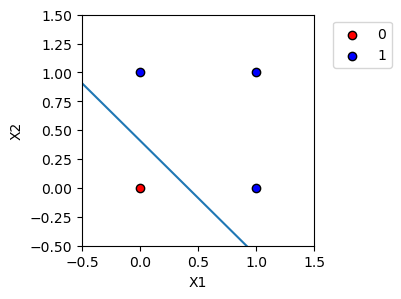

In [14]:
plot_decision_boundary(X, y, W)

In [16]:
W = perceptron_sigmoid_bce(X_preprocessed_sigmoid)
W

array([[ 5.28422863],
       [11.4883685 ],
       [11.48879271]])

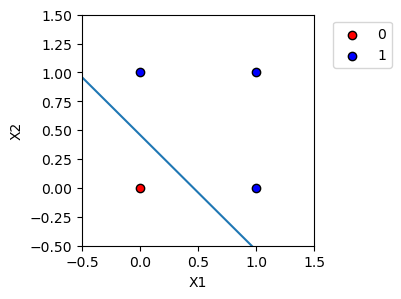

In [17]:
plot_decision_boundary(X, y, W)